In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import pandas as pd
import random
from scipy.stats import pearsonr
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test_df = pd.read_table("lcp_multi_test.tsv", keep_default_na=False, quoting=3)

In [4]:
test_df.head()

,id,corpus,sentence,token,complexity
0,3UXQ63NLAAMRIP4WG4XPD98AOYOBLX,bible,"for he had an only daughter, about twelve year...",only daughter,0.025000
1,3FJ2RVH25Z62TA3R8E1O77EBUYU92W,bible,All these were cities fortified with high wall...,high walls,0.100000
2,3YO4AH2FPDK1PZHZAT8WAEBL70EQ0F,bible,"In the morning, 'It will be foul weather today...",weather today,0.125000
3,3X52SWXE0X5Q3O81YI0MX4V84QTCWZ,bible,Her young children also were dashed in pieces ...,young children,0.160714
4,32K26U12DNONTREA84Q1V8UCIH2VD7,bible,All king Solomon's drinking vessels were of go...,pure gold,0.178571


In [5]:
len(test_df)

184

In [6]:
random.seed(0)
random_test_indexes = random.sample(range(len(test_df)), 100)
random_test_indexes.sort()

In [7]:
test_df.iloc[random_test_indexes][["corpus", "sentence", "token", "complexity"]]

,corpus,sentence,token,complexity
0,bible,"for he had an only daughter, about twelve year...",only daughter,0.025000
3,bible,Her young children also were dashed in pieces ...,young children,0.160714
4,bible,All king Solomon's drinking vessels were of go...,pure gold,0.178571
8,bible,The sixth captain for the sixth month was Ira ...,sixth month,0.194444
10,bible,"""His lord said to him, 'Well done, good and fa...",faithful servant,0.214286
...,...,...,...,...
171,europarl,The EU as a global actor: its role in multilat...,multilateral organisations,0.460526
175,europarl,Under Article 7(2) of the Act of 20 September ...,incompatible mandates,0.500000
176,europarl,These e-mails come from an organisation called...,constituent organisations,0.500000
178,europarl,The next item is the debate on the report (A5-...,development programme,0.532609


**Manually obtained predictions for the 100 data points in ChatGPT using few-shot template below, results saved in 'multi_token_gpt_log.json**



```
Predict the lexical complexity score of a designated target multiword expression in the input sentence. Complexity is a continuous float value between 0 and 1.  Complexity scores are assigned as follows:
0 = "very easy",  a multiword expression which would be very familiar to a human annotator
0.25 = "easy", or a multiword expression with which an annotator would be aware of the meaning
0.5 = "neutral", a multiword expression which is neither difficult nor easy
0.75 = "difficult", a multiword expression where an annotator would be unclear of the meaning but may be able to infer the meaning from the sentence
1 = "very difficult", a multiword expression that an annotator would have never seen before, or would be very unclear
The predicted complexity should be closest to the appropriate score but may be any intermediate float value.
Output template: "Float value between 0 and 1"
Input: "Because your loving kindness is better than life, my lips shall praise you."
Target multiword expression: "loving kindness"
Output: 0.04999999999999999
Input: "Don't turn from it to the right hand or to the left, that you may have good success wherever you go."
Target multiword expression: "right hand"
Output: 0.3970588235294118
Input: "Now I have brought it to pass, that it should be yours to destroy fortified cities, turning them into ruinous heaps."
Target multiword expression: "ruinous heaps"
Output: 0.6388888888888888
Input : "Therefore, TGFβ and BMP signaling are playing distinct but necessary roles to maintain articular cartilage."
Target multiword expression: "necessary roles"
Output:  0.18055555555555558
Input: "Colocalization of AQP2-F204V with the ER protein calnexin in transfected MDCK cells shows that, while most of the mutant protein is trapped in the ER, some does progress beyond the ER."
Target multiword expression: "mutant protein"
Output:  0.5384615384615384
Input: "Most of the atypical splice forms we observe appear to encode non-functional transcripts, containing frameshifts or lacking a start codon or other functional residues conserved throughout the olfactory receptor family."
Target multiword expression: "start codon"
Output: 0.8333333333333333
Input: "Account must also be taken of the costs to health, the environment and the climate of the fact that vehicles emit different types of particles and that, in burning fossil fuels, they cause increased pollution and thus more global warming."
Target multiword expression: "fossil fuels"
Output: 0.171875
Input: "(IT) Madam President, ladies and gentlemen, the oral amendment that our Group is proposing involves replacing the words 'all forms of glorifying' by the word 'apology'."
Target multiword expression: "oral amendment"
Output: 0.3382352941176471
Input: "You will recall that in the April plenary we passed a resolution in this House inviting Mr Rugova to address the Foreign Affairs Committee."
Target multiword expression: "April plenary"
Output: 0.6111111111111112
Input: "[Input sentence]"
Target multiword expression: "[Input token]"
Output:
```



In [8]:
results_df = pd.read_json('multi_token_gpt_log.json')

In [23]:
results_df.head()

,test_point,test_data_row,corpus,sentence,token,gpt_input,actual_complexity,predicted_complexity
0,1,0,bible,"for he had an only daughter, about twelve year...",only daughter,Predict the lexical complexity score of a desi...,0.025000,0.297297
1,2,3,bible,Her young children also were dashed in pieces ...,young children,Predict the lexical complexity score of a desi...,0.160714,0.297297
2,3,4,bible,All king Solomon's drinking vessels were of go...,pure gold,Predict the lexical complexity score of a desi...,0.178571,0.279412
3,4,8,bible,The sixth captain for the sixth month was Ira ...,sixth month,Predict the lexical complexity score of a desi...,0.194444,0.367647
4,5,10,bible,"""His lord said to him, 'Well done, good and fa...",faithful servant,Predict the lexical complexity score of a desi...,0.214286,0.411765


In [10]:
pearsonr(results_df['actual_complexity'], results_df['predicted_complexity'])

PearsonRResult(statistic=0.587063180034023, pvalue=1.3678614825824977e-10)

In [11]:
sklearn.metrics.r2_score(results_df['actual_complexity'], results_df['predicted_complexity'])

0.20277663367829069

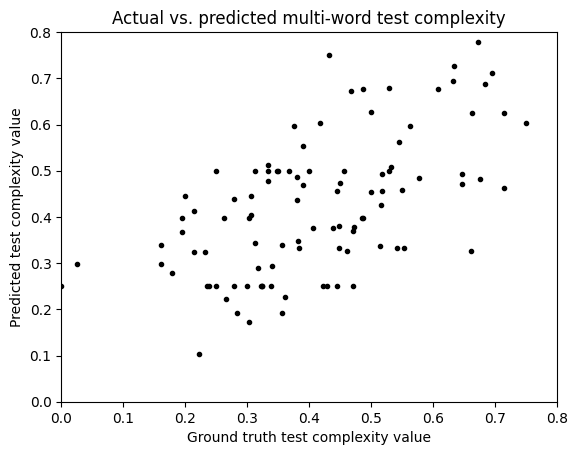

In [15]:
plt.plot(results_df['actual_complexity'], results_df['predicted_complexity'], 'k.')
plt.xlabel("Ground truth test complexity value")
plt.ylabel("Predicted test complexity value")
plt.title("Actual vs. predicted multi-word test complexity")
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.show()

In [17]:
bible_test_idx = np.where(results_df['corpus']=='bible')
biomed_test_idx = np.where(results_df['corpus']=='biomed')
europarl_test_idx = np.where(results_df['corpus']=='europarl')

In [21]:
print(pearsonr(results_df.iloc[bible_test_idx]['actual_complexity'], results_df.iloc[bible_test_idx]['predicted_complexity']))
print(pearsonr(results_df.iloc[biomed_test_idx]['actual_complexity'], results_df.iloc[biomed_test_idx]['predicted_complexity']))
print(pearsonr(results_df.iloc[europarl_test_idx]['actual_complexity'], results_df.iloc[europarl_test_idx]['predicted_complexity']))

PearsonRResult(statistic=0.7202904527632381, pvalue=1.5640118899613284e-06)
PearsonRResult(statistic=0.6681489727057172, pvalue=4.0014548025106645e-05)
PearsonRResult(statistic=0.3590728407341089, pvalue=0.03414322046659722)


In [22]:
print(sklearn.metrics.r2_score(results_df.iloc[bible_test_idx]['actual_complexity'], results_df.iloc[bible_test_idx]['predicted_complexity']))
print(sklearn.metrics.r2_score(results_df.iloc[biomed_test_idx]['actual_complexity'], results_df.iloc[biomed_test_idx]['predicted_complexity']))
print(sklearn.metrics.r2_score(results_df.iloc[europarl_test_idx]['actual_complexity'], results_df.iloc[europarl_test_idx]['predicted_complexity']))

0.16727351003915092
0.4422061712557741
-0.90216540284457


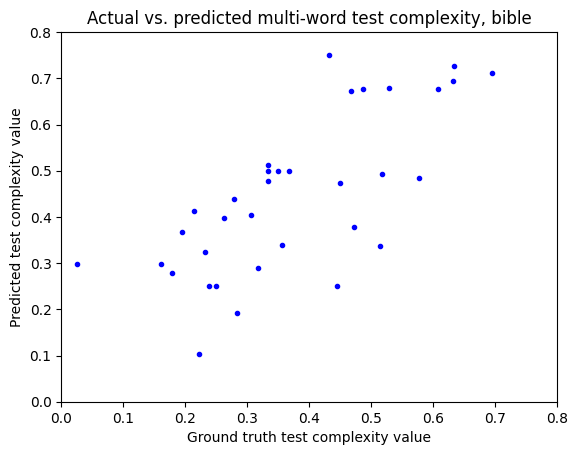

In [25]:
plt.plot(results_df.iloc[bible_test_idx]['actual_complexity'], results_df.iloc[bible_test_idx]['predicted_complexity'], 'b.')
plt.xlabel("Ground truth test complexity value")
plt.ylabel("Predicted test complexity value")
plt.title("Actual vs. predicted multi-word test complexity, bible")
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.show()

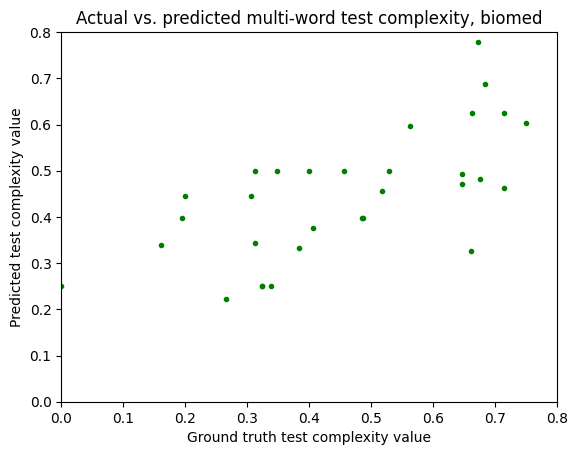

In [28]:
plt.plot(results_df.iloc[biomed_test_idx]['actual_complexity'], results_df.iloc[biomed_test_idx]['predicted_complexity'], 'g.')
plt.xlabel("Ground truth test complexity value")
plt.ylabel("Predicted test complexity value")
plt.title("Actual vs. predicted multi-word test complexity, biomed")
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.show()

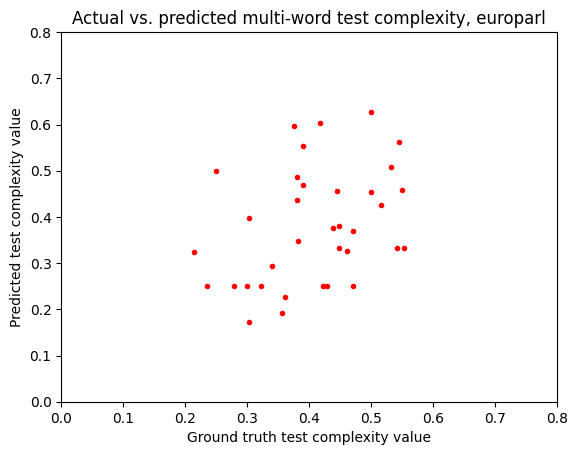

In [29]:
plt.plot(results_df.iloc[europarl_test_idx]['actual_complexity'], results_df.iloc[europarl_test_idx]['predicted_complexity'], 'r.')
plt.xlabel("Ground truth test complexity value")
plt.ylabel("Predicted test complexity value")
plt.title("Actual vs. predicted multi-word test complexity, europarl")
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.show()